## Exercises - 1

In [91]:
import pandas as pd
import numpy as np

In [92]:
passengers = pd.read_csv('passengerData.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5


In [93]:
tickets = pd.read_excel('ticketPrices.xlsx')
tickets.head()

,TicketType,Fare
0,1,33
1,2,56
2,3,77
3,4,22
4,5,14


In [94]:
merged_data = pd.merge(passengers, tickets, on='TicketType')
merged_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,33
1,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1,33
2,17,0,3,"Rice, Master. Eugene",male,2.0,1,33
3,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,1,33
4,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,1,33


In [95]:
merged_data.Fare > 40

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [96]:
merged_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [97]:
max_data = merged_data['Age'].max()
max_data

80.0

In [98]:
oldest_passenger = merged_data[(merged_data.Age == max_data)]
oldest_passenger.Name

747    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

<Axes: xlabel='Age', ylabel='Fare'>

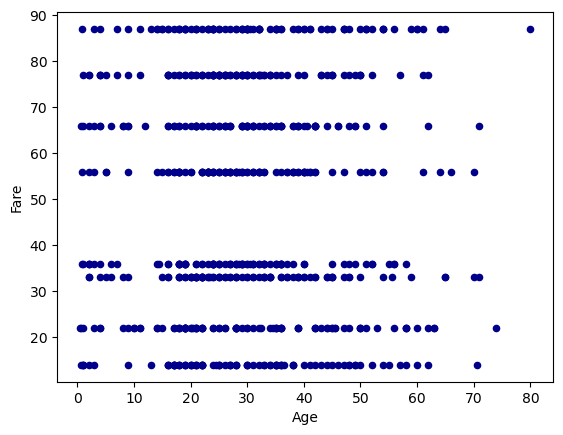

In [99]:
merged_data.plot.scatter(x='Age', y = 'Fare', c='DarkBlue')

In [100]:
filter_data = merged_data[(merged_data['Sex'] == 'female') & (merged_data['Age'] >= 40.0) & (merged_data['Age'] <= 50.0) & (merged_data['Fare'] >= 40)]
filter_data

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType,Fare
132,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,2,56
134,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,2,56
154,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,2,56
188,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,2,56
220,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,2,56
248,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,3,77
267,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,3,77
269,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,3,77
281,459,1,2,"Toomey, Miss. Ellen",female,50.0,3,77
312,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,3,77


<Axes: xlabel='Age', ylabel='Fare'>

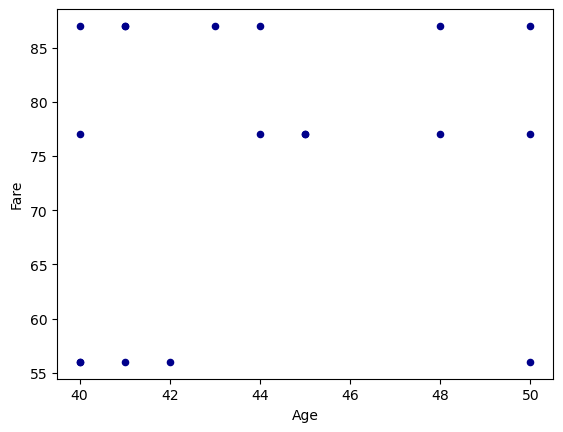

In [101]:
filter_data.plot.scatter(x='Age', y = 'Fare', c='DarkBlue')

## Exercises - 2 : Missing values

In [102]:
titanic_df = pd.read_csv('titanicSurvival_m.csv')
titanic_df2 = pd.read_csv('titanicSurvival_m.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

In [104]:
titanic_df.describe() #To describe the dataset like giving count,mean, min, std etc.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
titanic_df.Age.describe() #To describe the Age column 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [106]:
titanic_df.describe(include=[np.number]) #To describe the numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
titanic_df.describe(include=[object]) #To describe the object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [108]:
titanic_df.describe(include='all') #To describe the whole dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,845.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.304319,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.792612,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [109]:
titanic_df['Age'] = titanic_df['Age'].fillna(0)
titanic_df.Age.isnull().sum()

0

In [110]:
titanic_df['Fare'] = titanic_df['Fare'].fillna(0)
titanic_df.Age.isnull().sum()

0

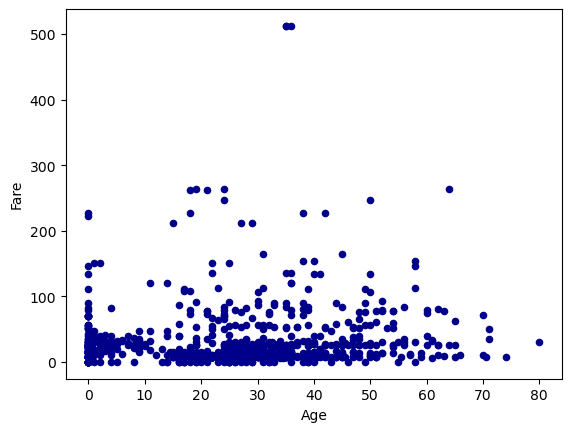

In [111]:
Y = titanic_df.plot.scatter(x='Age', y = 'Fare', c='DarkBlue')

In [112]:
titanic_df2['Age'] = titanic_df2['Age'].fillna(titanic_df2['Age'].mean()) 
titanic_df2.Age.isnull().sum()

0

In [113]:
titanic_df2['Fare'] = titanic_df2['Fare'].fillna(titanic_df2['Fare'].mean()) 
titanic_df2.Fare.isnull().sum()

0

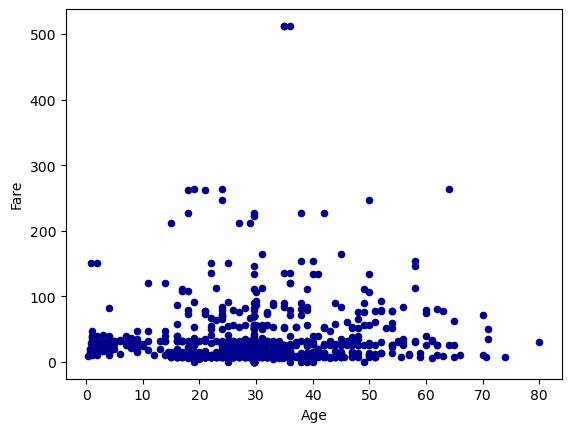

In [114]:
X = titanic_df2.plot.scatter(x='Age', y = 'Fare', c='DarkBlue')

In [115]:
X = titanic_df['Age']
Y = titanic_df['Fare']

In [116]:
X1 = titanic_df2['Age']
Y1 = titanic_df2['Fare']

Text(0.5, 0, 'Graph With Mean values')

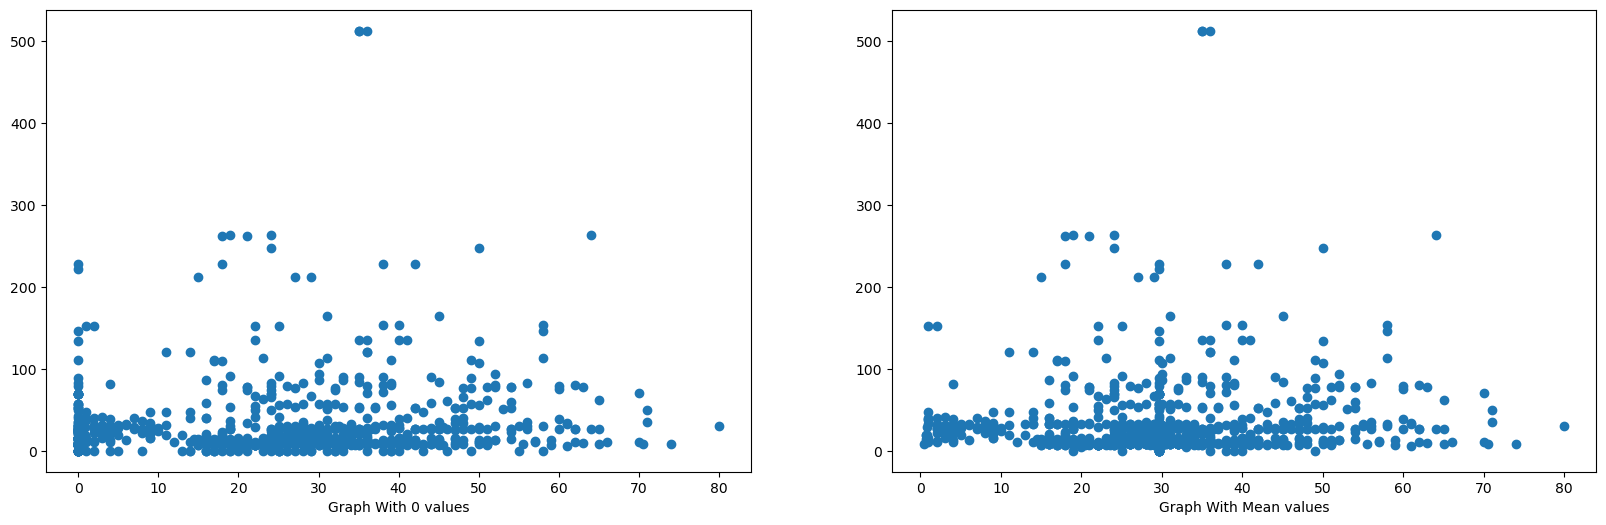

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.subplot(121)

plt.scatter(X,Y)
plt.xlabel("Graph With 0 values")

plt.subplot(122)
plt.scatter(X1,Y1)
plt.xlabel("Graph With Mean values")

## Exercises - 3 : Data Transformations

In [118]:
tuberculosis_df = pd.read_csv('TB_burden_countries_2014-09-29.csv')
tuberculosis_df

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,327.0,112.0,655.0,...,0.35,0.22,0.52,41.0,25.0,60.0,Model,20.0,13.0,32.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,359.0,172.0,613.0,...,0.36,0.19,0.58,45.0,24.0,73.0,Model,97.0,77.0,120.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,387.0,169.0,693.0,...,0.37,0.19,0.62,51.0,26.0,86.0,Model,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,412.0,186.0,724.0,...,0.38,0.20,0.63,58.0,30.0,95.0,Model,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,431.0,199.0,751.0,...,0.40,0.21,0.64,65.0,35.0,100.0,Model,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,Zimbabwe,ZW,ZWE,716,AFR,2008,12784041,445.0,56.0,1228.0,...,574.00,447.00,716.00,73000.0,57000.0,92000.0,Surveillance,40.0,32.0,51.0
4899,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,423.0,49.0,1192.0,...,531.00,408.00,670.00,68000.0,53000.0,86000.0,Surveillance,50.0,40.0,65.0
4900,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,438.0,70.0,1136.0,...,480.00,371.00,603.00,63000.0,48000.0,79000.0,Surveillance,53.0,43.0,69.0
4901,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,458.0,93.0,1107.0,...,433.00,335.00,543.00,58000.0,45000.0,73000.0,Surveillance,48.0,38.0,62.0


In [119]:
tuberculosis_df.isnull().sum()

country                        0
iso2                          23
iso3                           0
iso_numeric                    0
g_whoregion                    0
year                           0
e_pop_num                      0
e_prev_100k                   11
e_prev_100k_lo                11
e_prev_100k_hi                11
e_prev_num                    11
e_prev_num_lo                 11
e_prev_num_hi                 11
e_mort_exc_tbhiv_100k          1
e_mort_exc_tbhiv_100k_lo       1
e_mort_exc_tbhiv_100k_hi       1
e_mort_exc_tbhiv_num           1
e_mort_exc_tbhiv_num_lo        1
e_mort_exc_tbhiv_num_hi        1
source_mort                    1
e_inc_100k                     1
e_inc_100k_lo                  1
e_inc_100k_hi                  1
e_inc_num                      1
e_inc_num_lo                   1
e_inc_num_hi                   1
e_tbhiv_prct                1250
e_tbhiv_prct_lo             1446
e_tbhiv_prct_hi             1446
e_inc_tbhiv_100k            1306
e_inc_tbhi

In [120]:
# Count number of zeros in all columns of Dataframe
for column_name in tuberculosis_df.columns:
    column = tuberculosis_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  country  is :  0
Count of zeros in column  iso2  is :  0
Count of zeros in column  iso3  is :  0
Count of zeros in column  iso_numeric  is :  0
Count of zeros in column  g_whoregion  is :  0
Count of zeros in column  year  is :  0
Count of zeros in column  e_pop_num  is :  0
Count of zeros in column  e_prev_100k  is :  0
Count of zeros in column  e_prev_100k_lo  is :  0
Count of zeros in column  e_prev_100k_hi  is :  0
Count of zeros in column  e_prev_num  is :  2
Count of zeros in column  e_prev_num_lo  is :  4
Count of zeros in column  e_prev_num_hi  is :  0
Count of zeros in column  e_mort_exc_tbhiv_100k  is :  158
Count of zeros in column  e_mort_exc_tbhiv_100k_lo  is :  286
Count of zeros in column  e_mort_exc_tbhiv_100k_hi  is :  129
Count of zeros in column  e_mort_exc_tbhiv_num  is :  162
Count of zeros in column  e_mort_exc_tbhiv_num_lo  is :  274
Count of zeros in column  e_mort_exc_tbhiv_num_hi  is :  137
Count of zeros in column  source_mort  is : 

In [121]:
tuberculosis_df['e_prev_100k_hi'] = tuberculosis_df['e_prev_100k_hi'].fillna(tuberculosis_df['e_prev_100k_hi'].mean()) 
tuberculosis_df.e_prev_100k_hi.isnull().sum()

0

<Figure size 20000x3000 with 0 Axes>

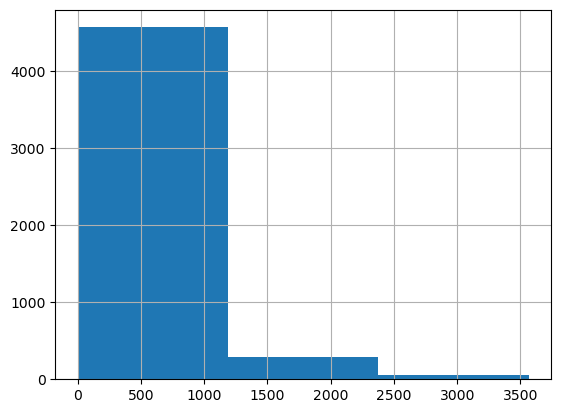

<Figure size 20000x3000 with 0 Axes>

In [122]:

tuberculosis_df['e_prev_100k_hi'].hist(bins=3)
plt.figure(figsize=(200,30))

In [131]:
numeric_columns_mean = tuberculosis_df.select_dtypes(include=['number']).mean()
numeric_columns_mean

iso_numeric                 4.334875e+02
year                        2.001042e+03
e_pop_num                   2.899179e+07
e_prev_100k                 2.076944e+02
e_prev_100k_lo              9.368330e+01
e_prev_100k_hi              3.781370e+02
e_prev_num                  6.914368e+04
e_prev_num_lo               4.366106e+04
e_prev_num_hi               1.064607e+05
e_mort_exc_tbhiv_100k       1.624542e+01
e_mort_exc_tbhiv_100k_lo    7.022778e+00
e_mort_exc_tbhiv_100k_hi    5.284693e+01
e_mort_exc_tbhiv_num        5.846978e+03
e_mort_exc_tbhiv_num_lo     3.185193e+03
e_mort_exc_tbhiv_num_hi     1.017236e+04
e_inc_100k                  1.352241e+02
e_inc_100k_lo               1.067412e+02
e_inc_100k_hi               1.692454e+02
e_inc_num                   4.098767e+04
e_inc_num_lo                3.327411e+04
e_inc_num_hi                5.042804e+04
e_tbhiv_prct                1.124149e+01
e_tbhiv_prct_lo             1.134943e+01
e_tbhiv_prct_hi             1.154434e+01
e_inc_tbhiv_100k

In [132]:
tuberculosis_df = tuberculosis_df.fillna(value = numeric_columns_mean)
tuberculosis_df.isnull().sum()

country                      0
iso2                        23
iso3                         0
iso_numeric                  0
g_whoregion                  0
year                         0
e_pop_num                    0
e_prev_100k                  0
e_prev_100k_lo               0
e_prev_100k_hi               0
e_prev_num                   0
e_prev_num_lo                0
e_prev_num_hi                0
e_mort_exc_tbhiv_100k        0
e_mort_exc_tbhiv_100k_lo     0
e_mort_exc_tbhiv_100k_hi     0
e_mort_exc_tbhiv_num         0
e_mort_exc_tbhiv_num_lo      0
e_mort_exc_tbhiv_num_hi      0
source_mort                  1
e_inc_100k                   0
e_inc_100k_lo                0
e_inc_100k_hi                0
e_inc_num                    0
e_inc_num_lo                 0
e_inc_num_hi                 0
e_tbhiv_prct                 0
e_tbhiv_prct_lo              0
e_tbhiv_prct_hi              0
e_inc_tbhiv_100k             0
e_inc_tbhiv_100k_lo          0
e_inc_tbhiv_100k_hi          0
e_inc_tb

In [144]:
numeric_columns = tuberculosis_df.select_dtypes(include=['number'])
numeric_columns

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
0,4,1990,11731193,327.0,112.0,655.0,38000.0,13000.0,77000.0,31.0,...,11.544342,0.35,0.22,0.52,41.0,25.0,60.0,20.000000,13.000000,32.00000
1,4,1991,12612043,359.0,172.0,613.0,45000.0,22000.0,77000.0,35.0,...,11.544342,0.36,0.19,0.58,45.0,24.0,73.0,97.000000,77.000000,120.00000
2,4,1992,13811876,387.0,169.0,693.0,53000.0,23000.0,96000.0,39.0,...,11.544342,0.37,0.19,0.62,51.0,26.0,86.0,67.570706,57.608038,83.01595
3,4,1993,15175325,412.0,186.0,724.0,62000.0,28000.0,110000.0,42.0,...,11.544342,0.38,0.20,0.63,58.0,30.0,95.0,67.570706,57.608038,83.01595
4,4,1994,16485018,431.0,199.0,751.0,71000.0,33000.0,120000.0,46.0,...,11.544342,0.40,0.21,0.64,65.0,35.0,100.0,67.570706,57.608038,83.01595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,716,2008,12784041,445.0,56.0,1228.0,57000.0,7100.0,160000.0,29.0,...,80.000000,574.00,447.00,716.00,73000.0,57000.0,92000.0,40.000000,32.000000,51.00000
4899,716,2009,12888918,423.0,49.0,1192.0,55000.0,6300.0,150000.0,28.0,...,80.000000,531.00,408.00,670.00,68000.0,53000.0,86000.0,50.000000,40.000000,65.00000
4900,716,2010,13076978,438.0,70.0,1136.0,57000.0,9100.0,150000.0,31.0,...,76.000000,480.00,371.00,603.00,63000.0,48000.0,79000.0,53.000000,43.000000,69.00000
4901,716,2011,13358738,458.0,93.0,1107.0,61000.0,12000.0,150000.0,35.0,...,72.000000,433.00,335.00,543.00,58000.0,45000.0,73000.0,48.000000,38.000000,62.00000


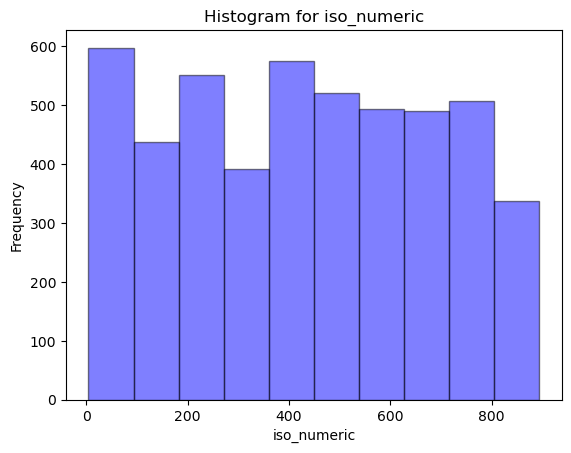

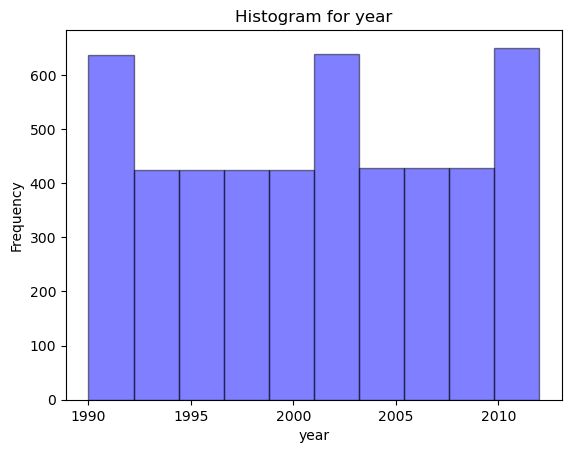

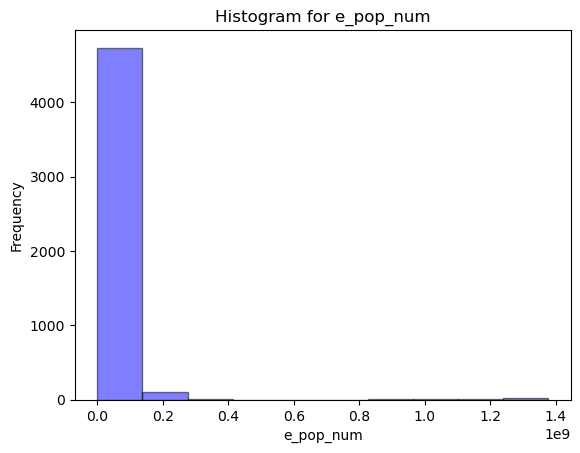

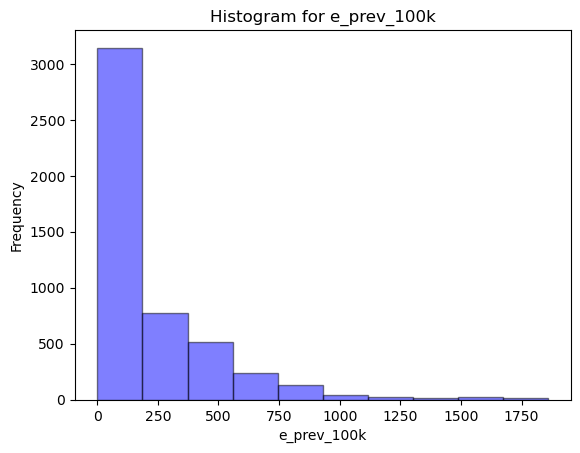

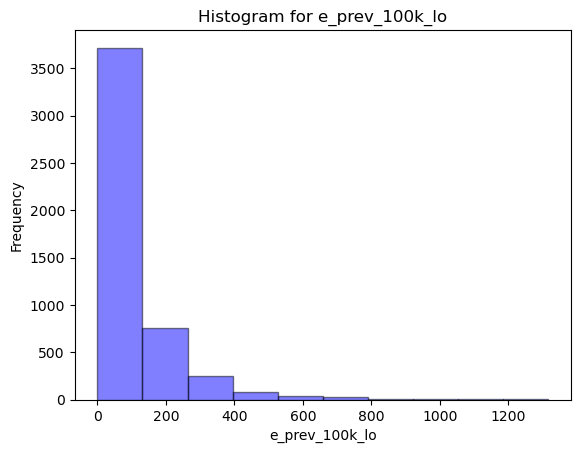

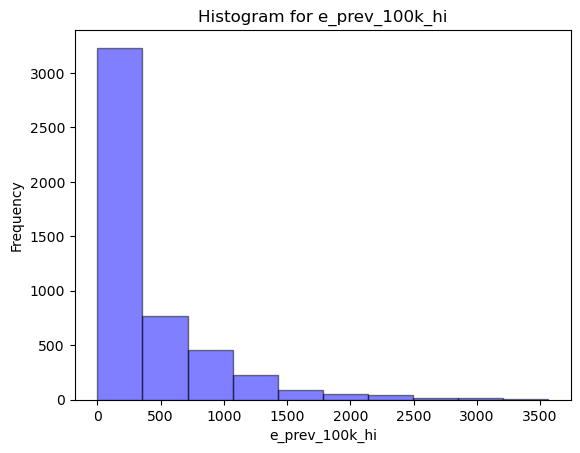

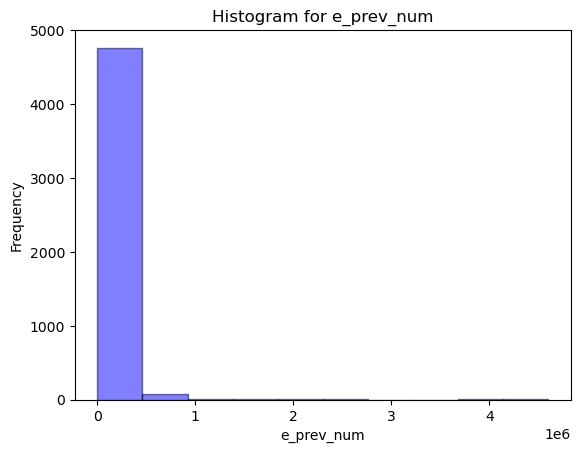

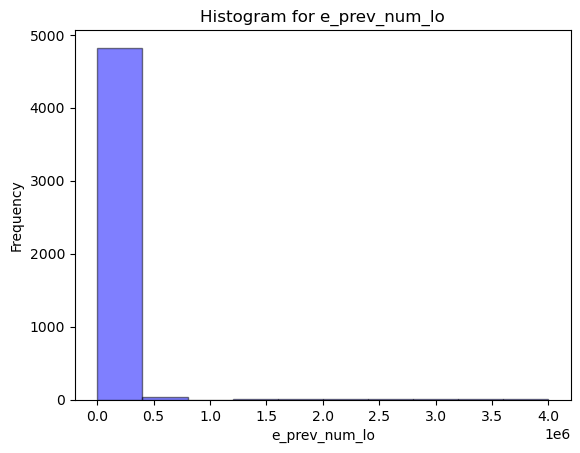

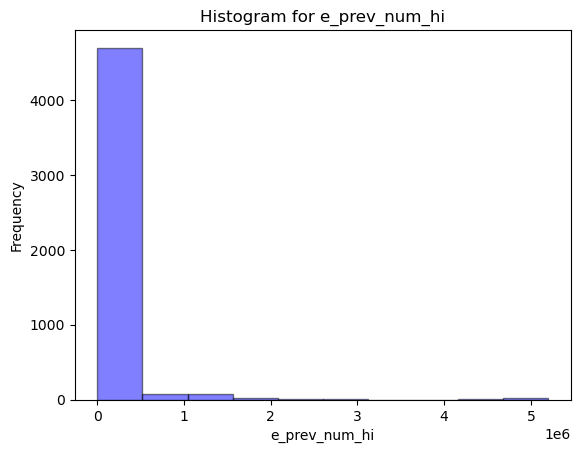

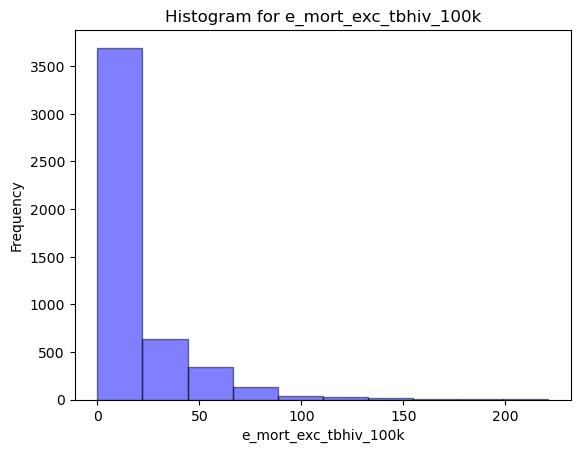

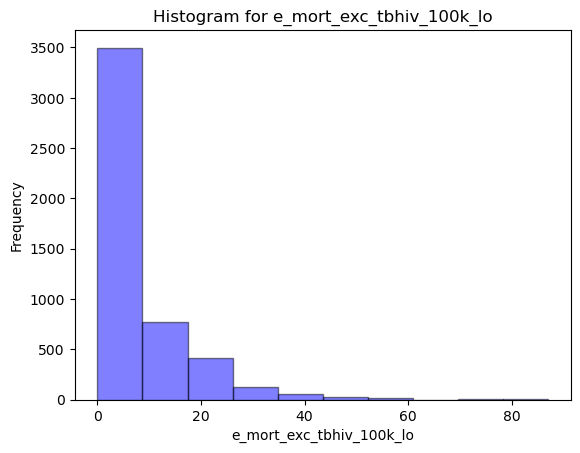

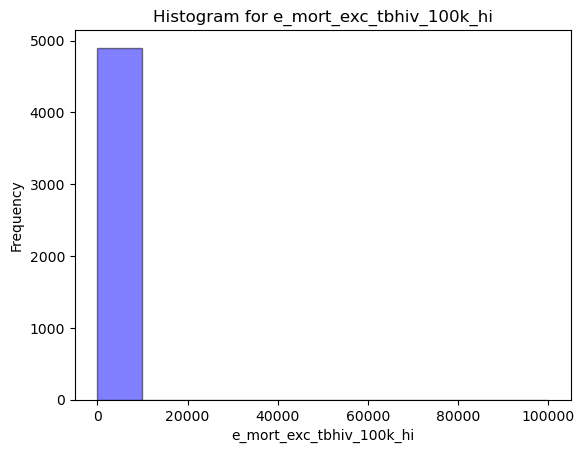

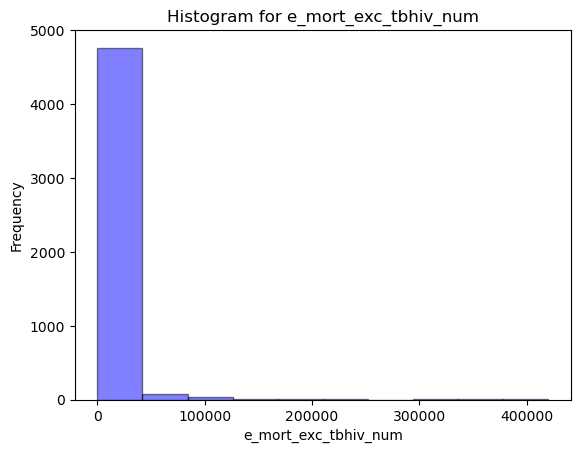

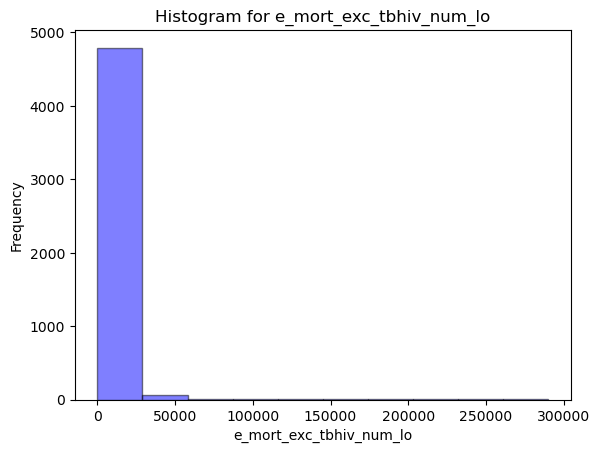

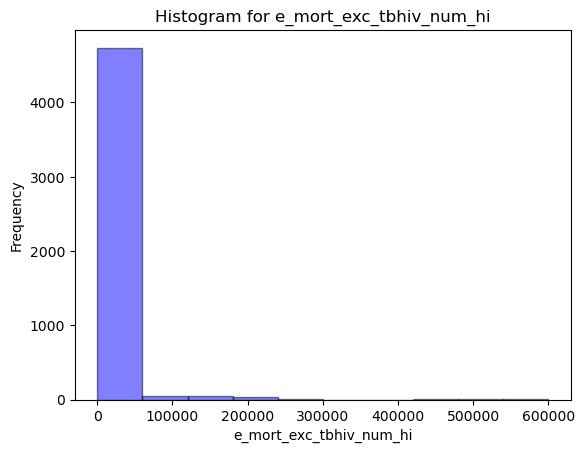

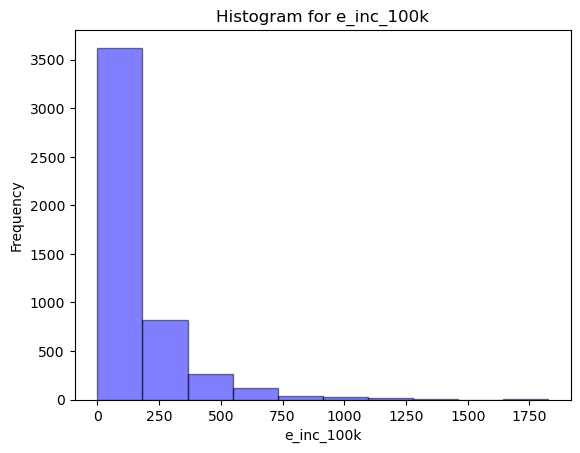

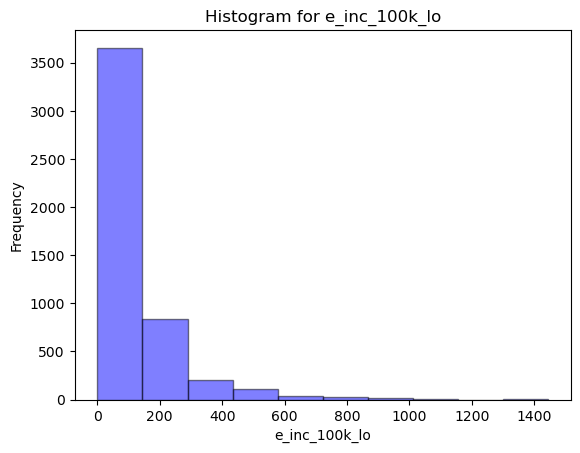

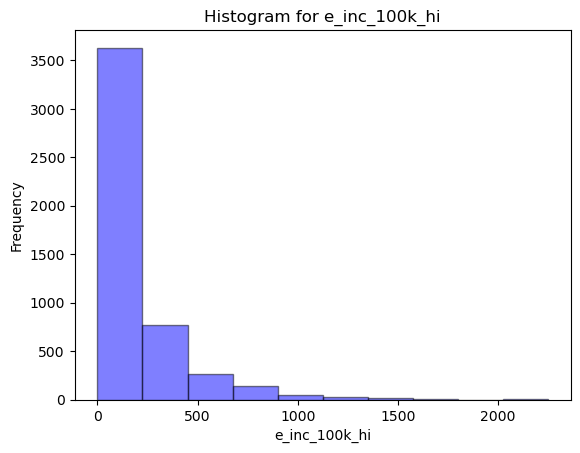

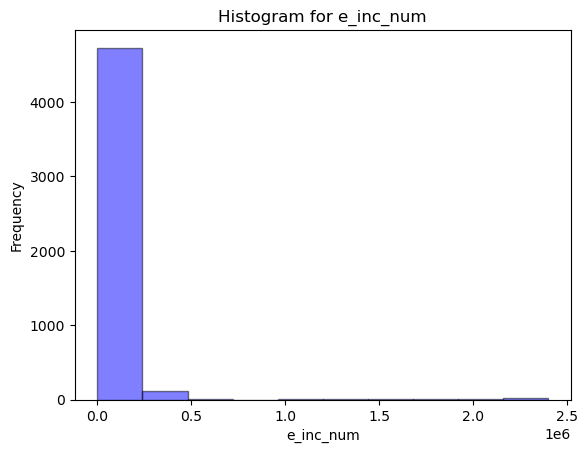

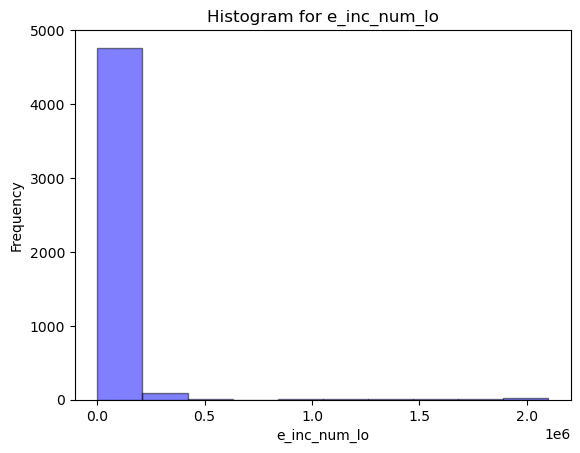

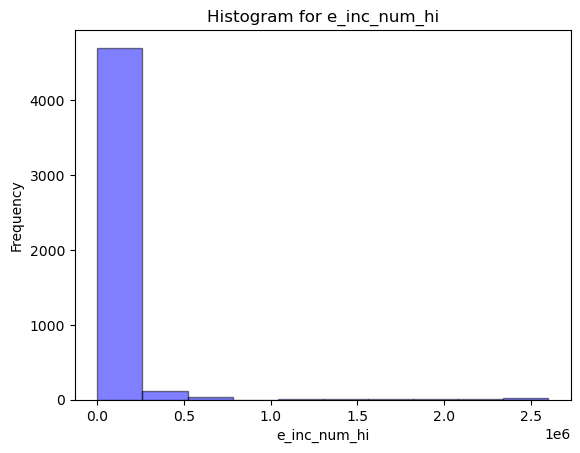

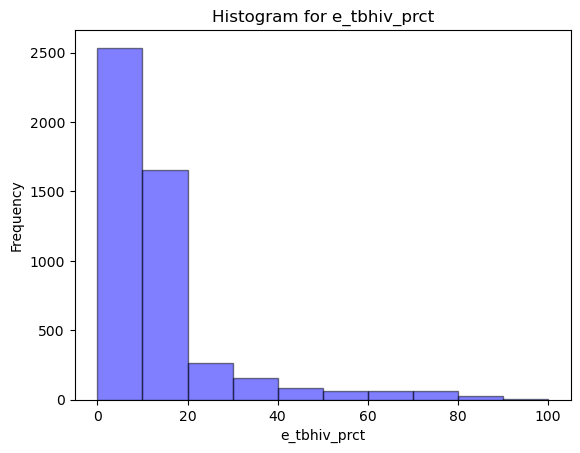

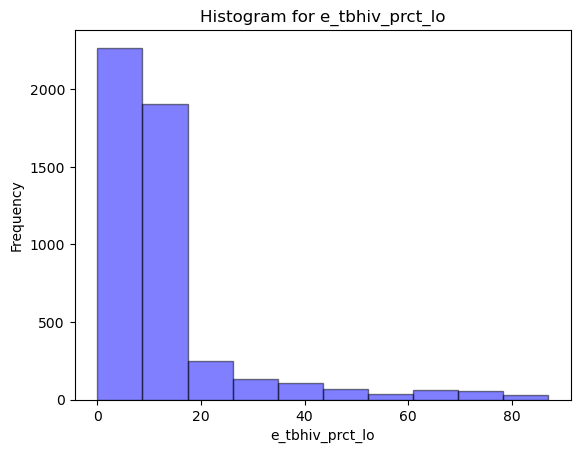

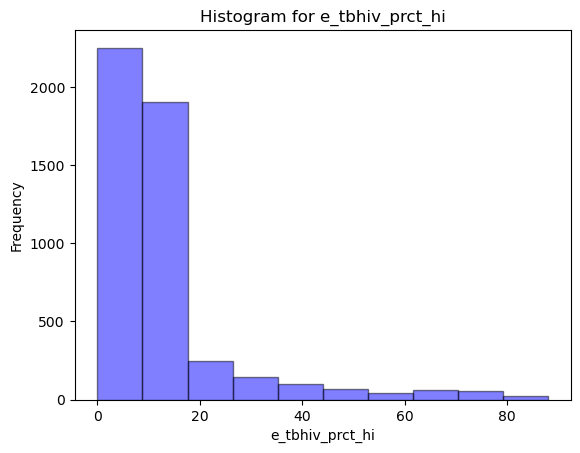

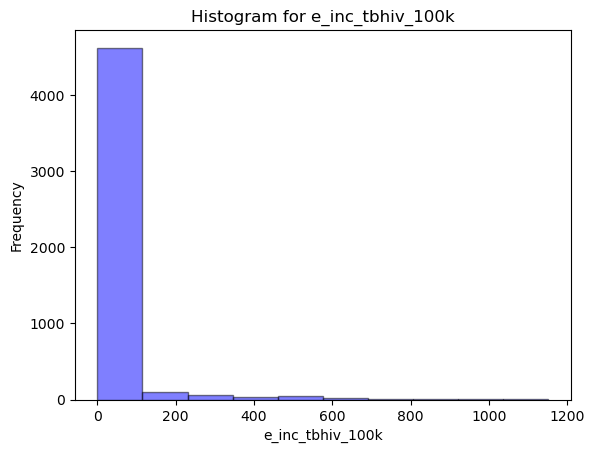

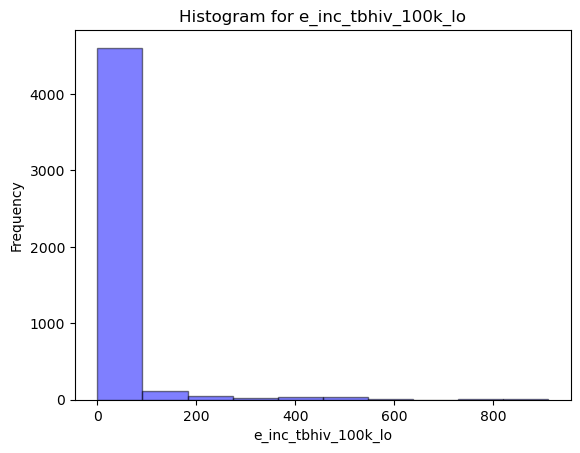

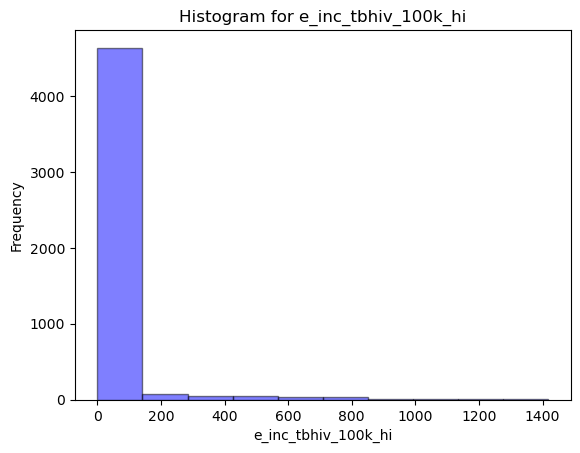

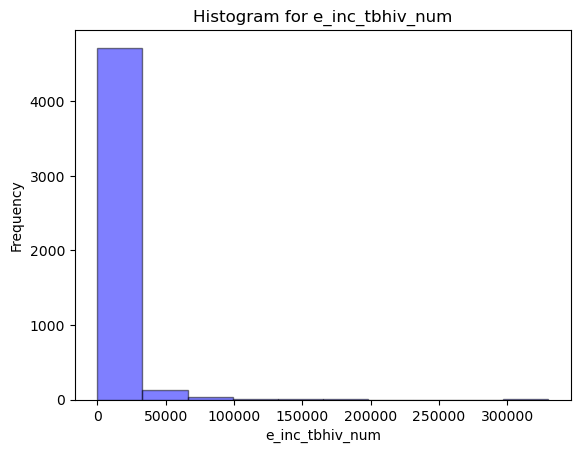

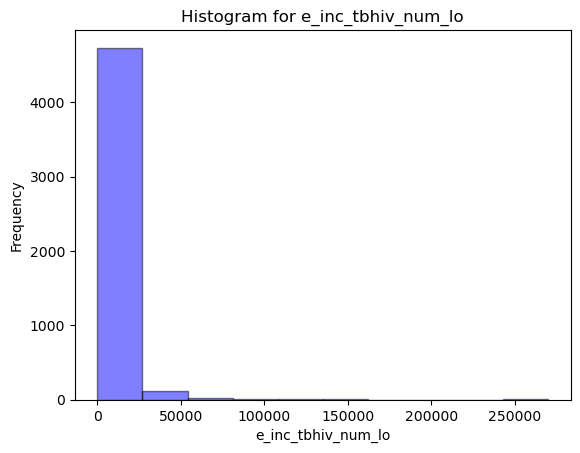

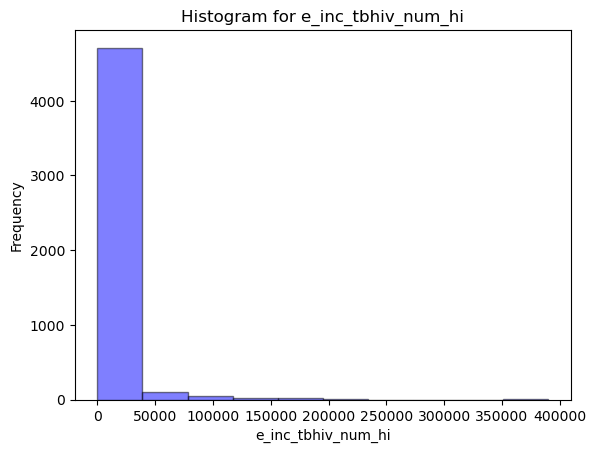

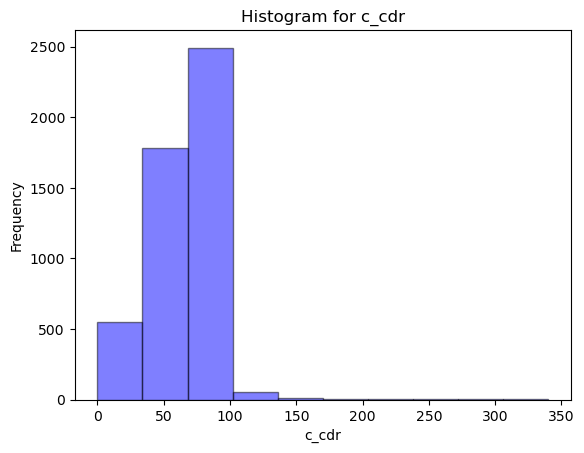

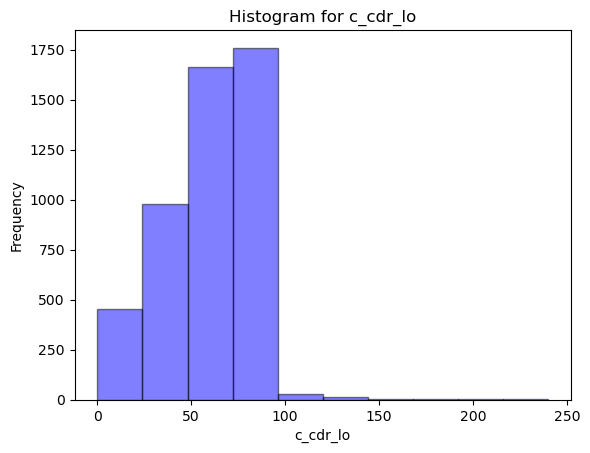

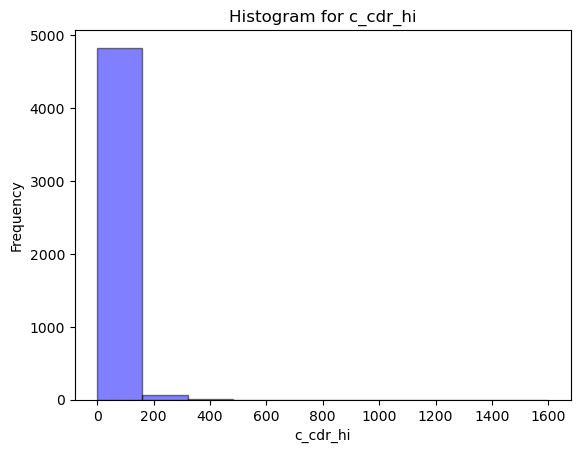

In [135]:
for column in numeric_columns.columns:
    plt.figure()
    plt.hist(numeric_columns[column], bins=10, alpha=0.5, color='b', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [145]:
numeric_df = tuberculosis_df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
numeric_df

/Users/mohdtalibakhtar/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,...,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,source_tbhiv,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,0.602060,EMR,3.298853,7.069342,2.514548,2.049218,2.816241,...,-0.455932,-0.657577,-0.283997,1.612784,1.397940,1.778151,Model,1.301030,1.113943,1.505150
1,Afghanistan,AF,AFG,0.602060,EMR,3.299071,7.100785,2.555094,2.235528,2.787460,...,-0.443697,-0.721246,-0.236572,1.653213,1.380211,1.863323,Model,1.986772,1.886491,2.079181
2,Afghanistan,AF,AFG,0.602060,EMR,3.299289,7.140253,2.587711,2.227887,2.840733,...,-0.431798,-0.721246,-0.207608,1.707570,1.414973,1.934498,Model,1.829758,1.760483,1.919162
3,Afghanistan,AF,AFG,0.602060,EMR,3.299507,7.181138,2.614897,2.269513,2.859739,...,-0.420216,-0.698970,-0.200659,1.763428,1.477121,1.977724,Model,1.829758,1.760483,1.919162
4,Afghanistan,AF,AFG,0.602060,EMR,3.299725,7.217089,2.634477,2.298853,2.875640,...,-0.397940,-0.677781,-0.193820,1.812913,1.544068,2.000000,Model,1.829758,1.760483,1.919162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,Zimbabwe,ZW,ZWE,2.854913,AFR,3.302764,7.106668,2.648360,1.748188,3.089198,...,2.758912,2.650308,2.854913,4.863323,4.755875,4.963788,Surveillance,1.602060,1.505150,1.707570
4899,Zimbabwe,ZW,ZWE,2.854913,AFR,3.302980,7.110216,2.626340,1.690196,3.076276,...,2.725095,2.610660,2.826075,4.832509,4.724276,4.934498,Surveillance,1.698970,1.602060,1.812913
4900,Zimbabwe,ZW,ZWE,2.854913,AFR,3.303196,7.116507,2.641474,1.845098,3.055378,...,2.681241,2.569374,2.780317,4.799341,4.681241,4.897627,Surveillance,1.724276,1.633468,1.838849
4901,Zimbabwe,ZW,ZWE,2.854913,AFR,3.303412,7.125765,2.660865,1.968483,3.044148,...,2.636488,2.525045,2.734800,4.763428,4.653213,4.863323,Surveillance,1.681241,1.579784,1.792392


In [147]:
numeric_columns_df = numeric_df.select_dtypes(include=['number'])
numeric_columns_df

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
0,0.602060,3.298853,7.069342,2.514548,2.049218,2.816241,4.579784,4.113943,4.886491,1.491362,...,1.062369,-0.455932,-0.657577,-0.283997,1.612784,1.397940,1.778151,1.301030,1.113943,1.505150
1,0.602060,3.299071,7.100785,2.555094,2.235528,2.787460,4.653213,4.342423,4.886491,1.544068,...,1.062369,-0.443697,-0.721246,-0.236572,1.653213,1.380211,1.863323,1.986772,1.886491,2.079181
2,0.602060,3.299289,7.140253,2.587711,2.227887,2.840733,4.724276,4.361728,4.982271,1.591065,...,1.062369,-0.431798,-0.721246,-0.207608,1.707570,1.414973,1.934498,1.829758,1.760483,1.919162
3,0.602060,3.299507,7.181138,2.614897,2.269513,2.859739,4.792392,4.447158,5.041393,1.623249,...,1.062369,-0.420216,-0.698970,-0.200659,1.763428,1.477121,1.977724,1.829758,1.760483,1.919162
4,0.602060,3.299725,7.217089,2.634477,2.298853,2.875640,4.851258,4.518514,5.079181,1.662758,...,1.062369,-0.397940,-0.677781,-0.193820,1.812913,1.544068,2.000000,1.829758,1.760483,1.919162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,2.854913,3.302764,7.106668,2.648360,1.748188,3.089198,4.755875,3.851258,5.204120,1.462398,...,1.903090,2.758912,2.650308,2.854913,4.863323,4.755875,4.963788,1.602060,1.505150,1.707570
4899,2.854913,3.302980,7.110216,2.626340,1.690196,3.076276,4.740363,3.799341,5.176091,1.447158,...,1.903090,2.725095,2.610660,2.826075,4.832509,4.724276,4.934498,1.698970,1.602060,1.812913
4900,2.854913,3.303196,7.116507,2.641474,1.845098,3.055378,4.755875,3.959041,5.176091,1.491362,...,1.880814,2.681241,2.569374,2.780317,4.799341,4.681241,4.897627,1.724276,1.633468,1.838849
4901,2.854913,3.303412,7.125765,2.660865,1.968483,3.044148,4.785330,4.079181,5.176091,1.544068,...,1.857332,2.636488,2.525045,2.734800,4.763428,4.653213,4.863323,1.681241,1.579784,1.792392


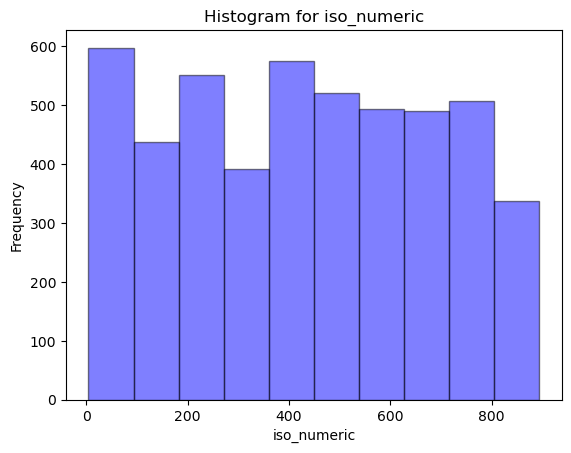

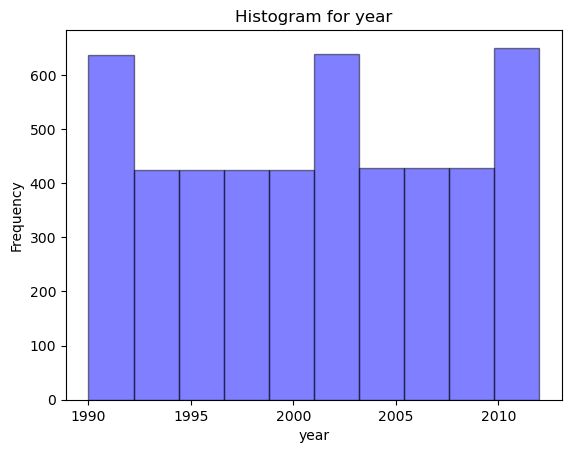

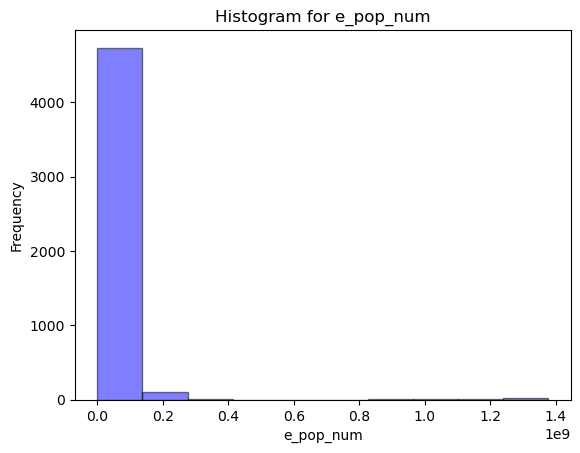

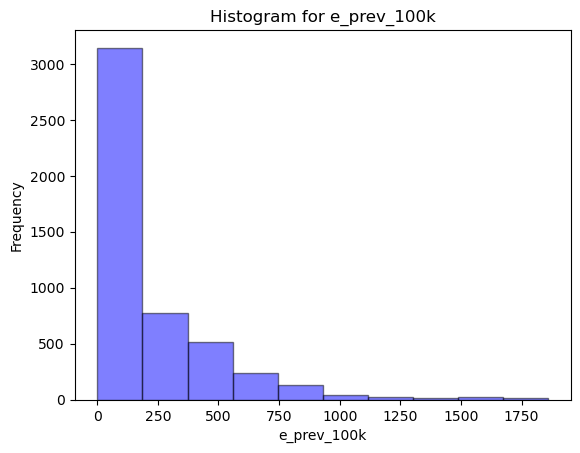

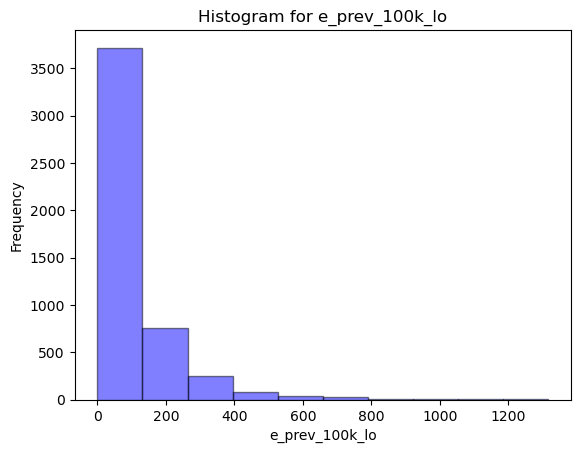

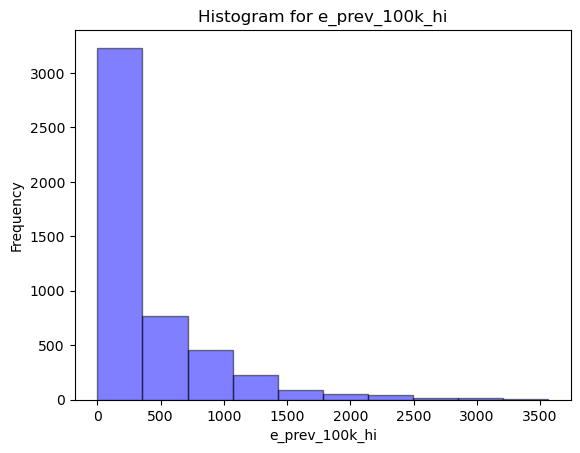

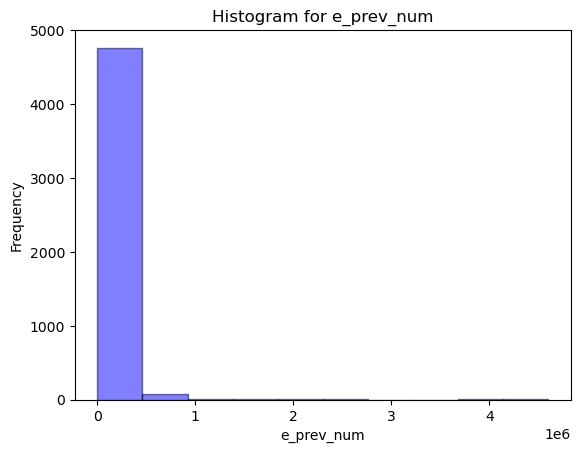

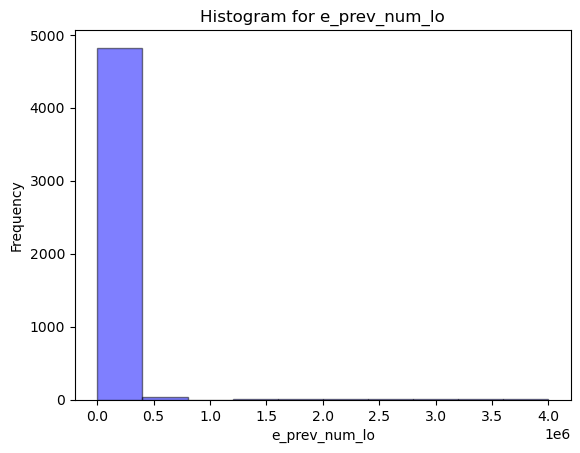

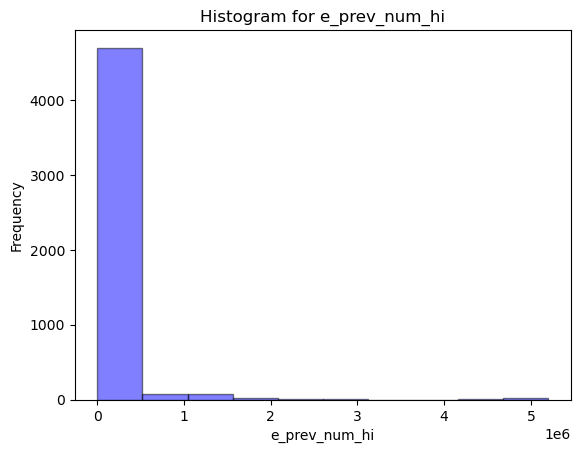

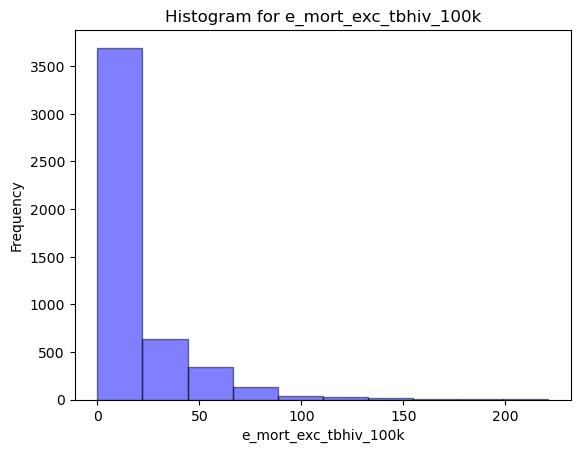

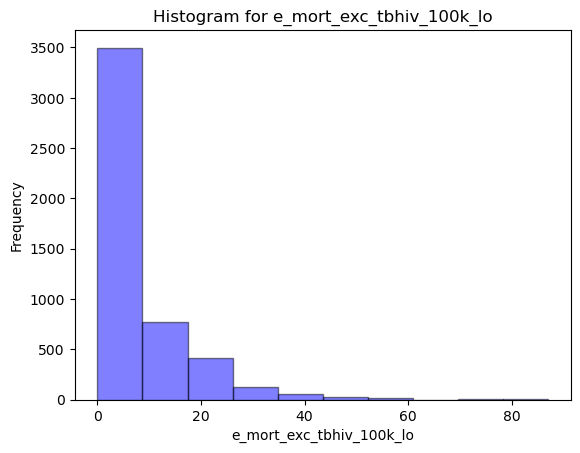

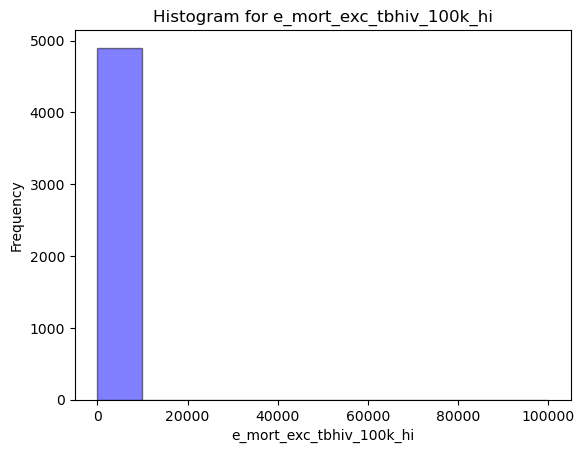

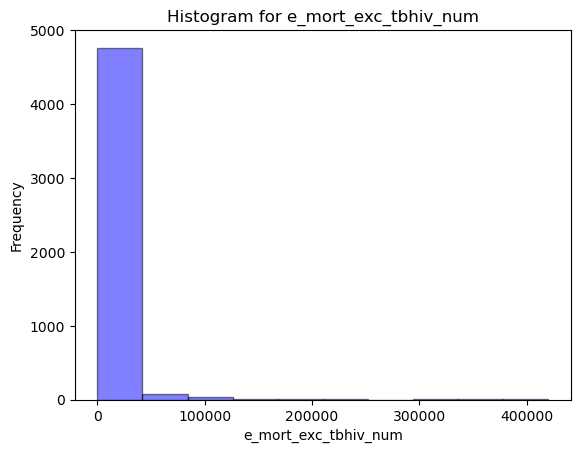

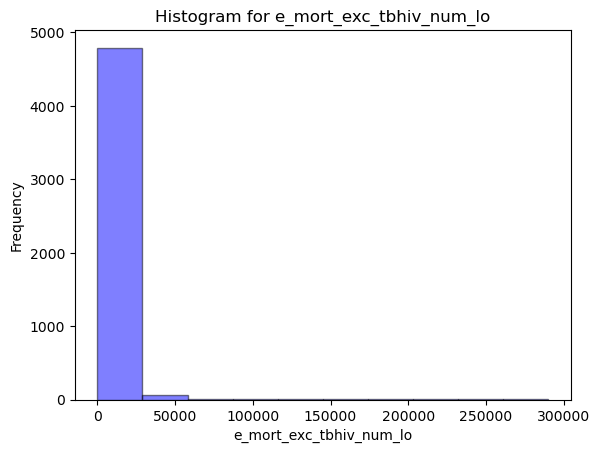

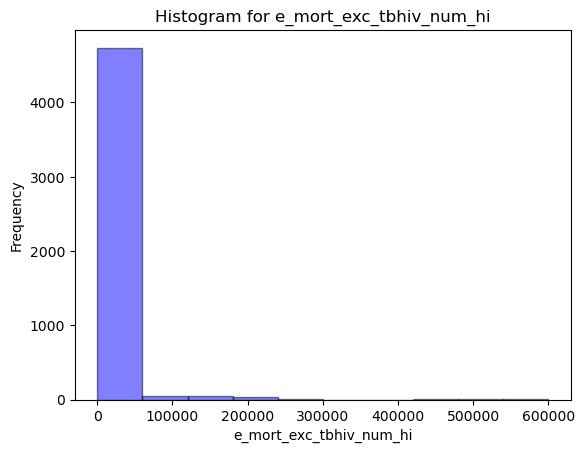

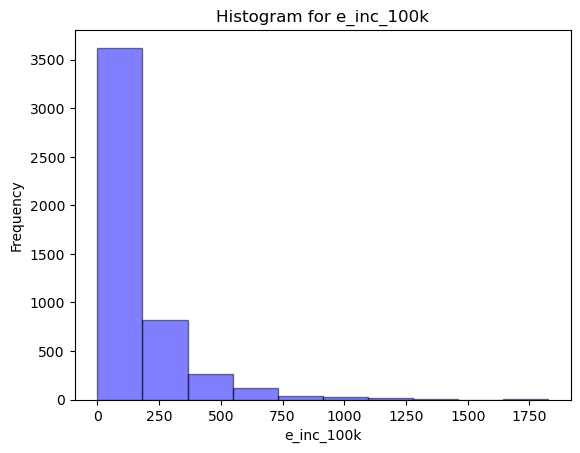

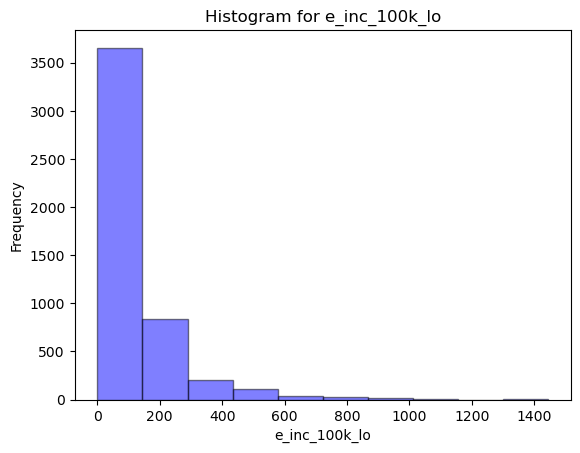

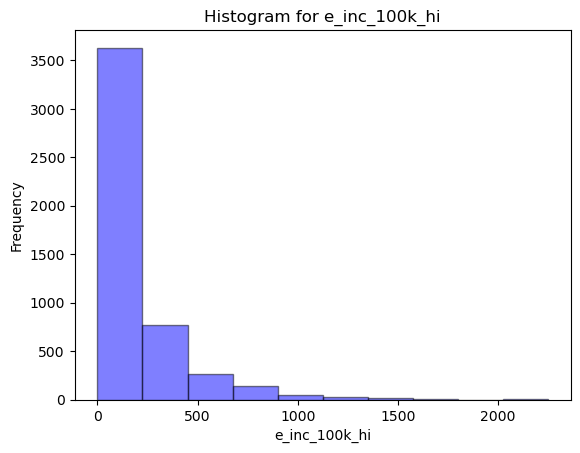

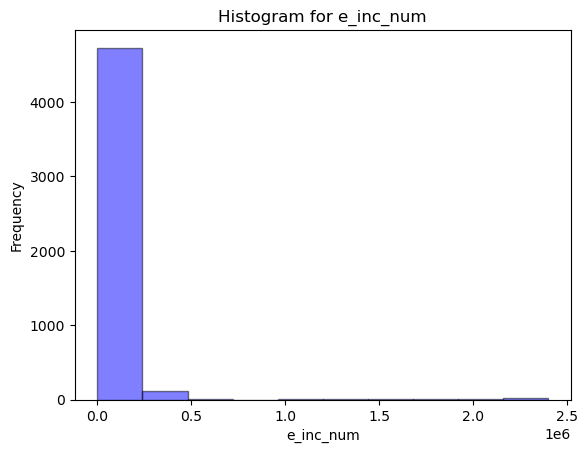

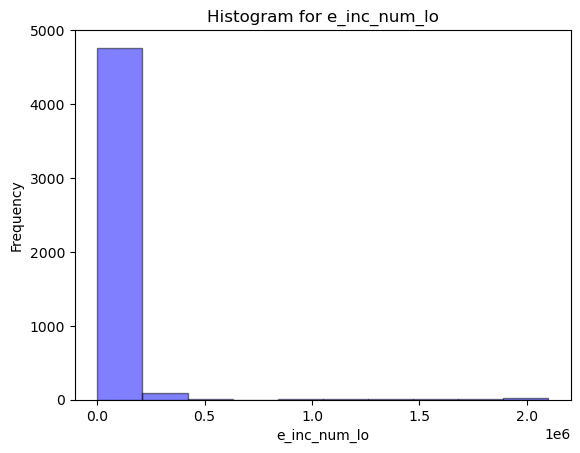

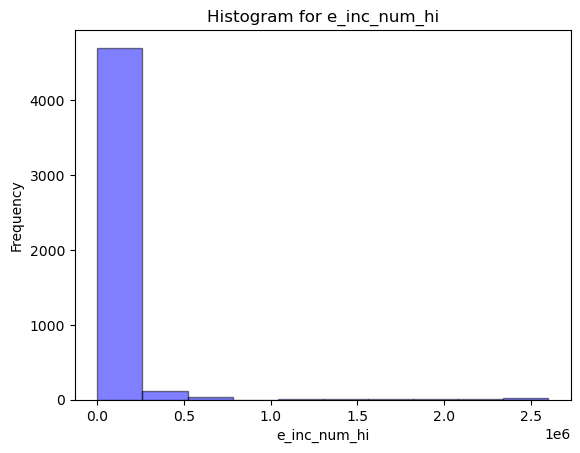

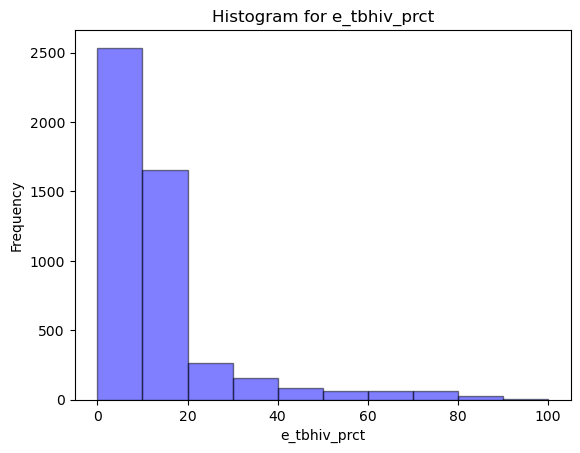

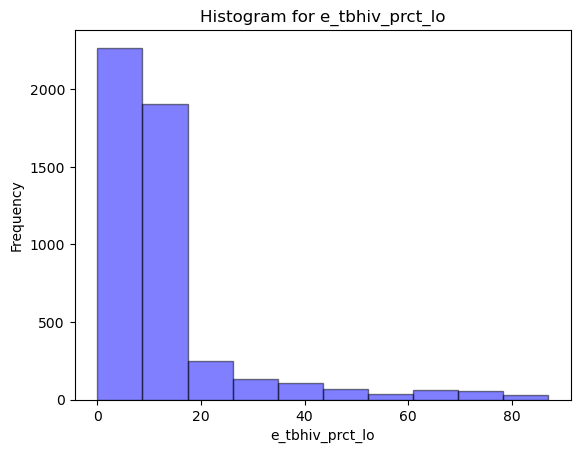

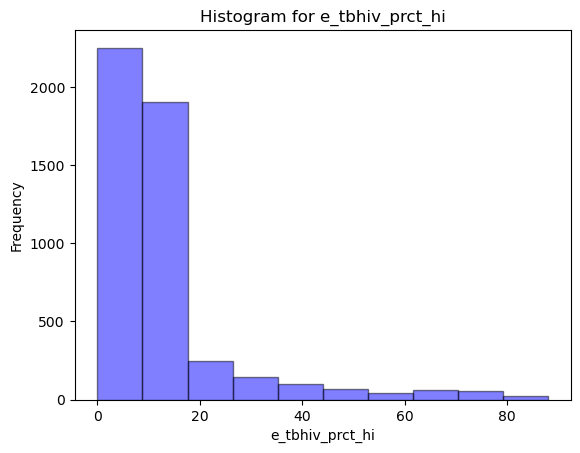

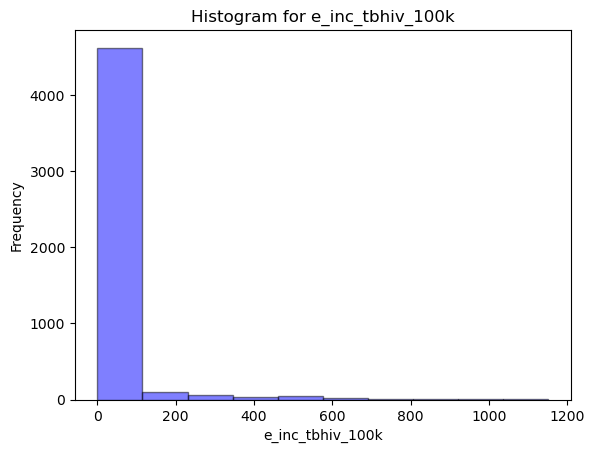

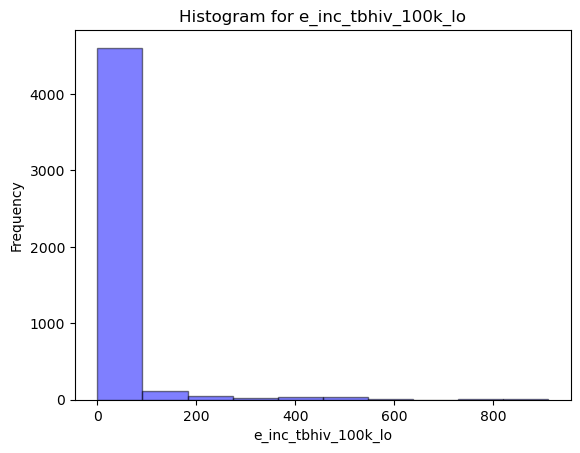

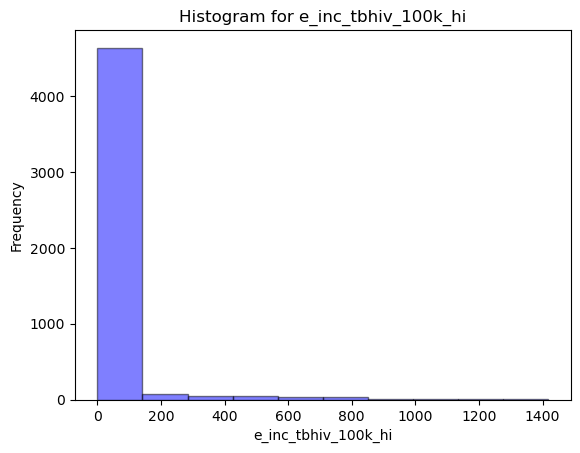

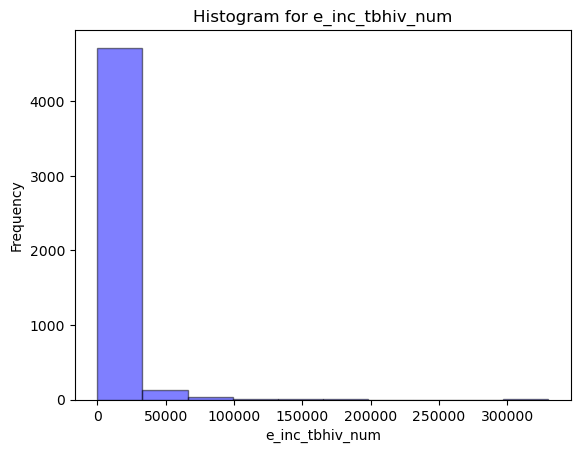

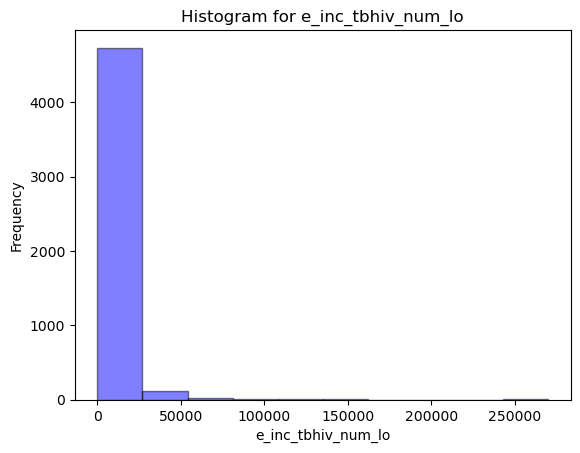

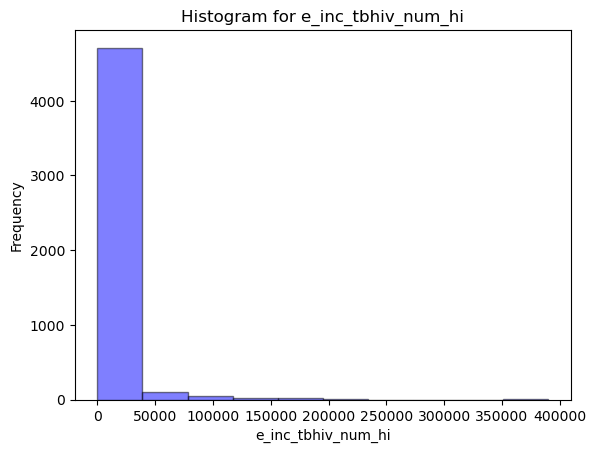

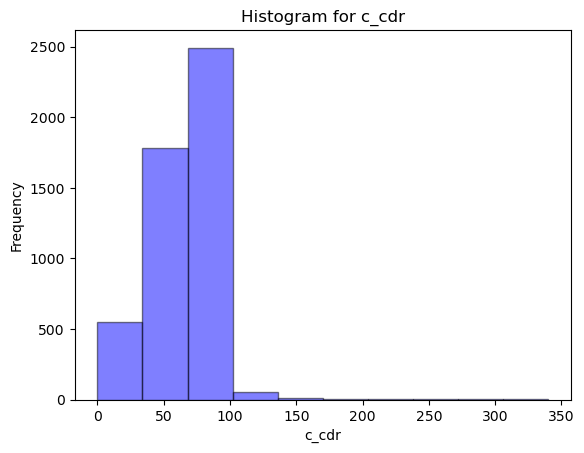

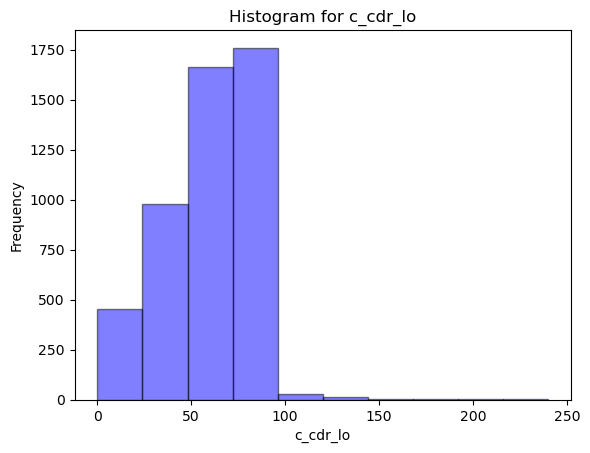

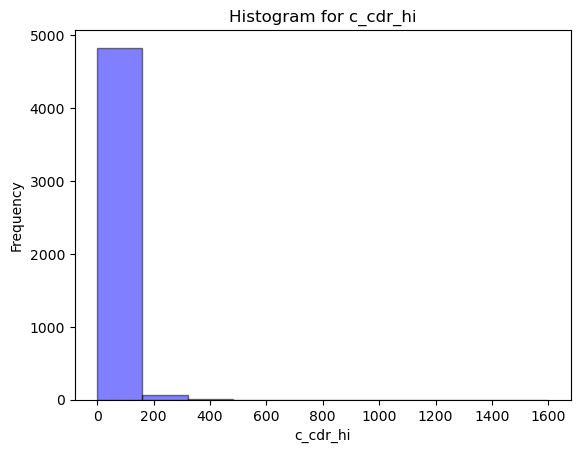

In [149]:
for column in numeric_columns_df.columns:
    plt.figure()
    plt.hist(numeric_columns[column], bins=10, alpha=0.5, color='b', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_columns[numeric_columns.columns] = scaler.fit_transform(numeric_columns)
numeric_columns

,iso_numeric,year,e_pop_num,e_prev_100k,e_prev_100k_lo,e_prev_100k_hi,e_prev_num,e_prev_num_lo,e_prev_num_hi,e_mort_exc_tbhiv_100k,...,e_tbhiv_prct_hi,e_inc_tbhiv_100k,e_inc_tbhiv_100k_lo,e_inc_tbhiv_100k_hi,e_inc_tbhiv_num,e_inc_tbhiv_num_lo,e_inc_tbhiv_num_hi,c_cdr,c_cdr_lo,c_cdr_hi
0,0.0,0.000000,0.008518,0.175691,0.085051,0.183607,0.008261,0.003250,0.014808,0.140271,...,0.131186,0.000304,0.000241,0.000367,0.000124,0.000093,0.000154,0.058824,0.054167,0.020000
1,0.0,0.045455,0.009158,0.192898,0.130646,0.171824,0.009783,0.005500,0.014808,0.158371,...,0.131186,0.000313,0.000209,0.000409,0.000136,0.000089,0.000187,0.285294,0.320833,0.075000
2,0.0,0.090909,0.010029,0.207954,0.128366,0.194268,0.011522,0.005750,0.018462,0.176471,...,0.131186,0.000321,0.000209,0.000437,0.000155,0.000096,0.000221,0.198737,0.240033,0.051885
3,0.0,0.136364,0.011019,0.221397,0.141285,0.202965,0.013478,0.007000,0.021154,0.190045,...,0.131186,0.000330,0.000220,0.000444,0.000176,0.000111,0.000244,0.198737,0.240033,0.051885
4,0.0,0.181818,0.011970,0.231613,0.151164,0.210540,0.015435,0.008250,0.023077,0.208145,...,0.131186,0.000348,0.000231,0.000451,0.000197,0.000130,0.000256,0.198737,0.240033,0.051885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,0.8,0.818182,0.009283,0.239141,0.042495,0.344361,0.012391,0.001775,0.030769,0.131222,...,0.909091,0.498697,0.490670,0.504937,0.221212,0.211111,0.235897,0.117647,0.133333,0.031875
4899,0.8,0.863636,0.009359,0.227311,0.037176,0.334261,0.011957,0.001575,0.028846,0.126697,...,0.909091,0.461338,0.447859,0.472496,0.206061,0.196296,0.220513,0.147059,0.166667,0.040625
4900,0.8,0.909091,0.009495,0.235377,0.053134,0.318550,0.012391,0.002275,0.028846,0.140271,...,0.863636,0.417029,0.407245,0.425247,0.190909,0.177778,0.202564,0.155882,0.179167,0.043125
4901,0.8,0.954545,0.009700,0.246131,0.070612,0.310414,0.013261,0.003000,0.028846,0.158371,...,0.818182,0.376195,0.367728,0.382934,0.175758,0.166667,0.187179,0.141176,0.158333,0.038750


In [157]:
numeric_columns_mean2 = numeric_columns.select_dtypes(include=['number']).mean()
numeric_columns_mean2

iso_numeric                 0.482570
year                        0.501919
e_pop_num                   0.021053
e_prev_100k                 0.111539
e_prev_100k_lo              0.071131
e_prev_100k_hi              0.105934
e_prev_num                  0.015031
e_prev_num_lo               0.010915
e_prev_num_hi               0.020473
e_mort_exc_tbhiv_100k       0.073509
e_mort_exc_tbhiv_100k_lo    0.080722
e_mort_exc_tbhiv_100k_hi    0.000528
e_mort_exc_tbhiv_num        0.013921
e_mort_exc_tbhiv_num_lo     0.010983
e_mort_exc_tbhiv_num_hi     0.016954
e_inc_100k                  0.074055
e_inc_100k_lo               0.073869
e_inc_100k_hi               0.075220
e_inc_num                   0.017078
e_inc_num_lo                0.015845
e_inc_num_hi                0.019395
e_tbhiv_prct                0.112415
e_tbhiv_prct_lo             0.130453
e_tbhiv_prct_hi             0.131186
e_inc_tbhiv_100k            0.033832
e_inc_tbhiv_100k_lo         0.034214
e_inc_tbhiv_100k_hi         0.033867
e